In [28]:
%matplotlib nbagg

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

### Setting up data
The data is originally a 3D array of the from 145x145x200, where 200 represents the spectral bands. 145x145 is the grid for the picture. To simplify the use of the array, the data shape is changed to 200x145x145. 

You can visualize this as a cube where 200 is the depth of the cube, while 145x145 represents the length and the width. 

In [4]:
data = np.load("indian_pine_array.npy")
data = np.transpose(data, (2, 0, 1))
wave = np.loadtxt("wavelength.txt")[20:]

# changing from callibrated value to radiance
radianceData = (data - 1000) / 500.0

### Visualizing Bands
The data we have includes band in the range 360 nm to 2500 nm. To visualize the grid at each band, we first extract the desired band from the data cube, and then we can plot the grid. 

Use the slider in the graph below to switch between the different bands

<IPython.core.display.Javascript object>


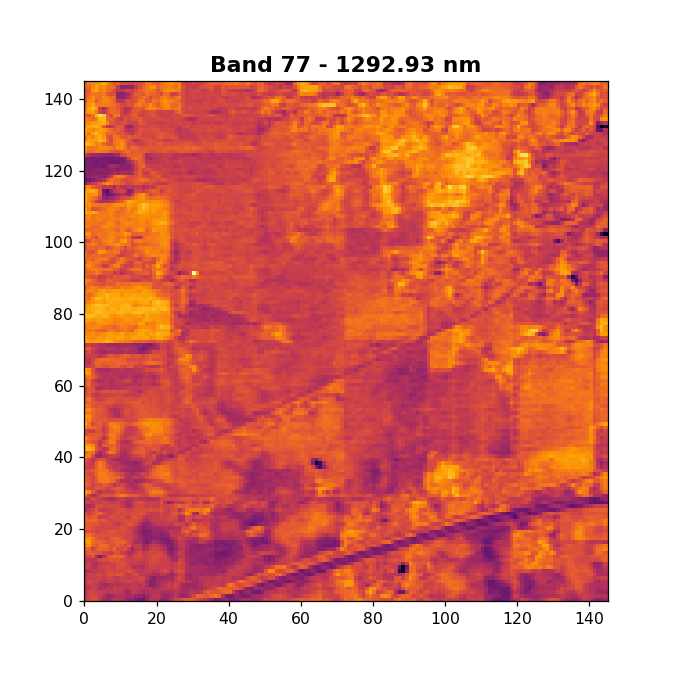

interactive(children=(IntSlider(value=100, description='Band', layout=Layout(width='60%'), max=200, min=1), Ou…

In [49]:
fig, ax = plt.subplots(figsize=(6, 6))


def updatePlot(band):
    ax.pcolormesh(data[band - 1], cmap="inferno")
    ax.set_title(
        "Band " + str(band) + " - " + str(wave[band - 1]) + " nm",
        fontsize=14,
        fontweight="bold",
    )


bandSlider = widgets.IntSlider(
    min=1, max=200, value=100, description="Band", layout=widgets.Layout(width="60%")
)
widgets.interactive(updatePlot, band=bandSlider)

### Spectral Response
The code above visualized the data as the grid at each spectral band. A different way to visualize the data is to get the spectral response of at each pixel of the data. Use the slider to get the spectral response at different pixels

In [54]:
def plotSpectralResponse(band, title, ax):
    ax.plot(wave, band)
    ax.set_title(
        title, fontsize=16, fontweight="bold", pad=8, fontname="Times New Roman"
    )
    ax.set_ylabel("Radiance", fontsize=13)
    ax.set_xlabel("Wavelength (nm)", fontsize=13)

<IPython.core.display.Javascript object>


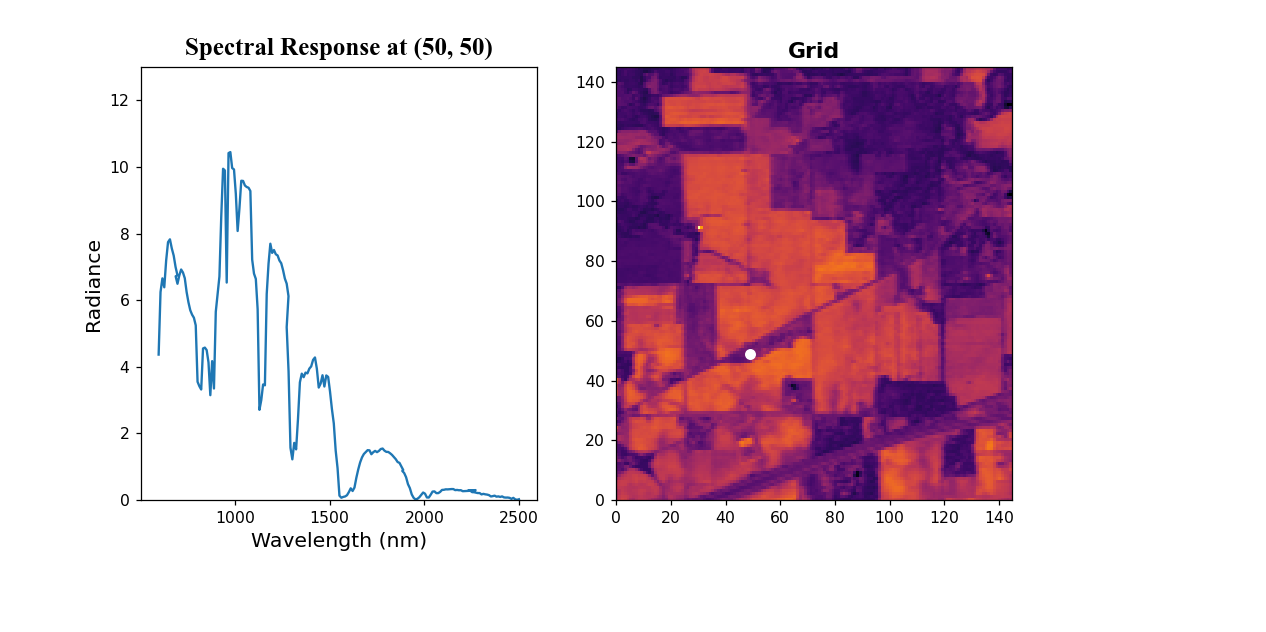

interactive(children=(IntSlider(value=50, description='x', layout=Layout(width='60%'), max=145, min=1), IntSli…

In [71]:
figPixel, axPixel = plt.subplots(1, 2, figsize=(10, 5))


def pixelPlot(x, y):
    axPixel[0].clear()
    axPixel[0].set_ylim(bottom=radianceData.min(), top=13)
    plotSpectralResponse(
        radianceData[:, x - 1, y - 1],
        "Spectral Response at (" + str(x) + ", " + str(y) + ")",
        axPixel[0],
    )

    axPixel[1].pcolormesh(data[135 - 1], cmap="inferno")
    axPixel[1].set_title("Grid", fontsize=14, fontweight="bold")
    axPixel[1].scatter(x - 1, y - 1, color="white")


x = widgets.IntSlider(
    min=1, max=145, value=50, description="x", layout=bandSlider.layout
)
y = widgets.IntSlider(
    min=1, max=145, value=50, description="y", layout=bandSlider.layout
)
widgets.interactive(pixelPlot, x=x, y=y)

#### Finding Spectral Response Over an Area
We can first try to fing the spectral response over the entire grid

<IPython.core.display.Javascript object>


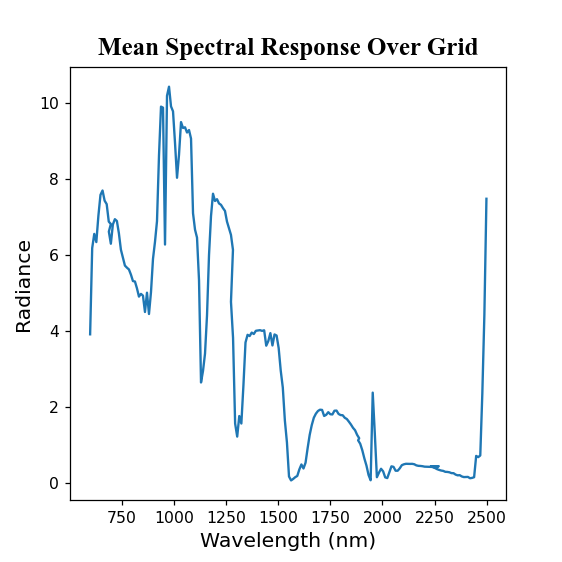

In [72]:
# mean spectral response over the whole area
meanSpectral = np.mean(
    radianceData, axis=1
)  # averaging the column leaving us with a 2d array of form 200x145
meanSpectral = np.mean(
    meanSpectral, axis=1
)  # averaging the column leaving us with a vector of length 200

figL, ax3 = plt.subplots(figsize=(5, 5))
plotSpectralResponse(meanSpectral, "Mean Spectral Response Over Grid", ax3)

The main function we are using is np.mean(data, axis). The axis refers to the direction along which you want to average you data. 

In a 3d array, **axis = 0** refers to averaging along **depths**, so if you do np.mean(data, axis =0), with a data with shape 200x145x145, you will be left with a 2d array of form 145x145, **axis = 1** refers to **columns** and **axis = 2** refers to **rows** //Need to fix this description if will use this in the workshop

In a 2d array, axis=0 refers to columns and axis = 1 refers to rows

**Try the exercise below to understand how to use the function better**

In [62]:
array3d = np.zeros((3, 4, 5))

print("3D array:")
print(
    "np.mean at axis = 0: ", np.mean(array3d, axis=0).shape
)  # Example, and student will write the rest
print(
    "np.mean at axis = 1: ", np.mean(array3d, axis=1).shape
)  # for student to write out
print(
    "np.mean at axis = 2: ", np.mean(array3d, axis=2).shape
)  # for student to write out

array2d = np.zeros((4, 5))
print("\n2D array:")
print(
    "np.mean at axis = 0: ", np.mean(array2d, axis=0).shape
)  # for student to write out
print(
    "np.mean at axis = 1: ", np.mean(array2d, axis=1).shape
)  # for student to write out

3D array:
np.mean at axis = 0:  (4, 5)
np.mean at axis = 1:  (3, 5)
np.mean at axis = 2:  (3, 4)

2D array:
np.mean at axis = 0:  (5,)
np.mean at axis = 1:  (4,)


Your mission should you choose to accept it is to find the spectral response over the area define by a square with vertices (53, 90), (70, 90), (70, 78), (53, 78)

<IPython.core.display.Javascript object>


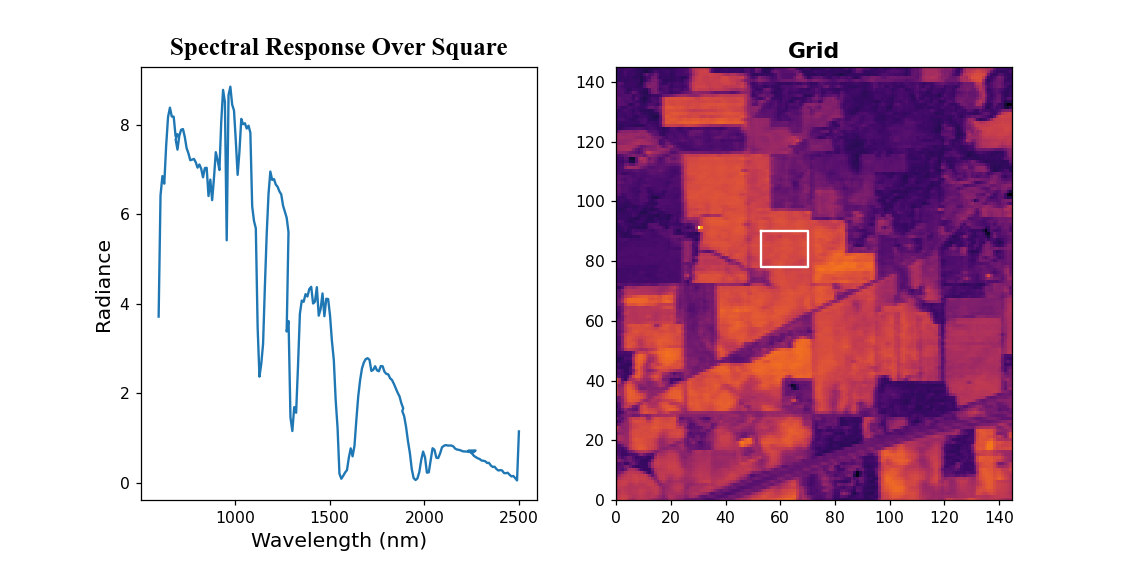

In [78]:
# solution
dataSubset = radianceData[:, 77:90, 52:70]
areaMean = np.mean(np.mean(dataSubset, axis=1), axis=1)

fig4, ax4 = plt.subplots(1, 2, figsize=(10, 5))

# plotting the square on the map
ax4[1].pcolormesh(data[135 - 1], cmap="inferno")
ax4[1].set_title("Grid", fontsize=14, fontweight="bold")
ptsx = [53, 70, 70, 53, 53]  # x points of square
ptsy = [90, 90, 78, 78, 90]
ax4[1].plot(ptsx, ptsy, color="white")

# plotting spectral response
plotSpectralResponse(areaMean, "Spectral Response Over Square", ax4[0])